In [59]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit,QuantumRegister, ClassicalRegister, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from qiskit.visualization import plot_histogram
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

Credentials are already in use. The existing account in the session will be replaced.


In [60]:
backend = Aer.get_backend('qasm_simulator')

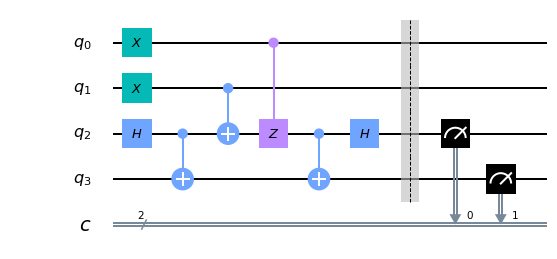

In [144]:
#Superdense Coding Protocol

circ = QuantumCircuit(4,2)
circ.x(0)
circ.x(1)
circ.h(2)
circ.cx(2, 3)
circ.cx(1, 2)
circ.cz(0, 2)

#przesłanie kwantowej informacji

circ.cx(2, 3)
circ.h(2)

circ.barrier()

#pomiar w bazie Bella

circ.measure(2,0)
circ.measure(3,1)

#przesłanie klasycznej informacji

circ.draw()

In [145]:
job_sim = execute(circ, backend)

result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'11': 1024}


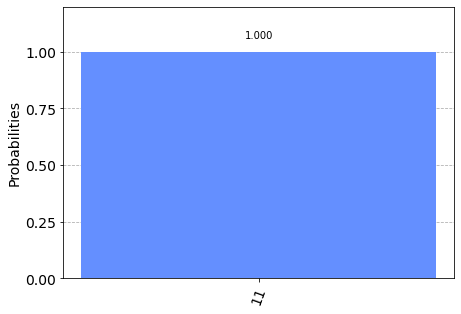

In [146]:
plot_histogram(counts)

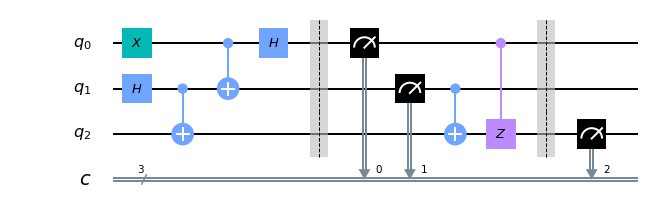

In [147]:
#Quantum teleportation

circ = QuantumCircuit(3,3)
circ.x(0)
circ.h(1)
circ.cx(1,2)
circ.cx(0,1)
circ.h(0)
circ.barrier()
#pomiar w bazie Bella
circ.measure(0,0)
circ.measure(1,1)
#przesłanie klasycznej informacji
circ.cx(1,2)
circ.cz(0,2)
circ.barrier()
circ.measure(2,2)

circ.draw()

In [148]:
job_sim = execute(circ, backend)

result_sim = job_sim.result()
counts = result_sim.get_counts(circ)
print(counts)

{'100': 288, '111': 258, '110': 234, '101': 244}


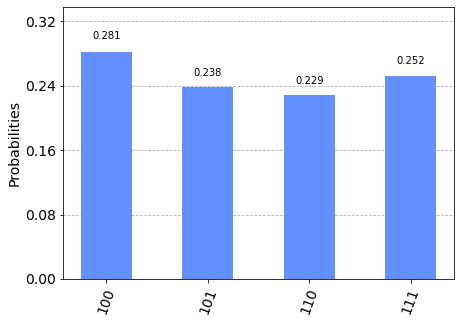

In [149]:
plot_histogram(counts)